# Models comparison table


### Environment setup

##### pip install

In [2]:
!pip install tensorflow==2.1.0

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached tensorflow-2.1.0-cp37-cp37m-manylinux2010_x86_64.whl (421.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached tensorflow_estimator-2.1.0-py2.py3-none-any.whl (448 kB)
  Using cached tensorboard-2.1.1-py3-none-any.whl (3.8 MB)
  Using cached gast-0.2.2-py3-none-any.whl
  Using cached grpcio-1.41.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.9 MB)
     |████████████████████████████████| 132 kB 4.5 MB/s eta 0:00:01
  Using cached termcolor-1.1.0-py3-none-any.whl
  Usi

In [3]:
!pip install numpy==1.19.5

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


##### versions

In [2]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.10 (default, Jun  4 2021, 14:48:32) 
[GCC 7.5.0]
Version info.
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [3]:
import numpy
numpy.version.version

'1.19.5'

In [4]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# LSTM applied to Stock Market data

### Goal
The main goal here is to __predict__ the next __BID CLOSE__.<br>
"*How much they will be paying for this active at the end of the next minute*"

### 1st Step

# Data Wrangling

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

import dataWrangling_v5 as dataWrangling

In [6]:
#dataIngest_csv
bucket='bnr-bucket-01'
file_key = 'EURUSD_Candlestick_1_M_BID_06.03.2021-11.03.2021.csv'
data = dataWrangling.dataIngest_csv(bucket, file_key)

#dataTransform
data = dataWrangling.dataTransform(data)
#data

#dataClean
data = dataWrangling.dataClean(data)
#data['bidclose'].plot()

### 2st Step

# Data Preparation (LSTM Model)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import numpy

import dataPrep_v3 as dataPrep

In [8]:
#BACKUP data
df=data

#splitData
train_data, test_data = dataPrep.splitData(df)
#BACKUP of slipts in UnNormalizedForm
train_data_unf = train_data
test_data_unf = test_data

#normalizeData
scaler=MinMaxScaler(feature_range=(0,1))
train_data, test_data, scaler = dataPrep.normalizeData(train_data, test_data, scaler)

# Create Matrix Dataset
time_step = 100
x_train, y_train = dataPrep.create_dataset(train_data, time_step)
x_test, y_test = dataPrep.create_dataset(test_data, time_step)

#Reshape [sample, time_steps, features]
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

train_data size:5760
test_test size:1440


### 3st Step

# single neuron RNN vs  single neuron STM

In [ ]:
import plotResults as plotResults

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN

import tensorflow as tf

In [112]:
singleRNN = Sequential(name="vanillaRNN")
singleRNN.add(SimpleRNN(1, input_shape=(x_train.shape[1],x_train.shape[2])))
singleRNN.compile(loss='mean_squared_error',optimizer='adam')

Train on 4528 samples, validate on 1132 samples
Epoch 1/50
4528/4528 [==============================] - 3s 609us/sample - loss: 2.9190e-04 - val_loss: 0.0157
Epoch 2/50
4528/4528 [==============================] - 2s 503us/sample - loss: 2.8533e-04 - val_loss: 0.0162
Epoch 3/50
4528/4528 [==============================] - 2s 496us/sample - loss: 2.7845e-04 - val_loss: 0.0167
Epoch 4/50
4528/4528 [==============================] - 2s 516us/sample - loss: 2.7277e-04 - val_loss: 0.0172
Epoch 5/50
4528/4528 [==============================] - 2s 501us/sample - loss: 2.6822e-04 - val_loss: 0.0177
Epoch 6/50
4528/4528 [==============================] - 2s 504us/sample - loss: 2.6324e-04 - val_loss: 0.0180
Epoch 7/50
4528/4528 [==============================] - 2s 497us/sample - loss: 2.5923e-04 - val_loss: 0.0185
Epoch 8/50
4528/4528 [==============================] - 2s 502us/sample - loss: 2.5515e-04 - val_loss: 0.0186
Epoch 9/50
4528/4528 [==============================] - 2s 514us/sample 

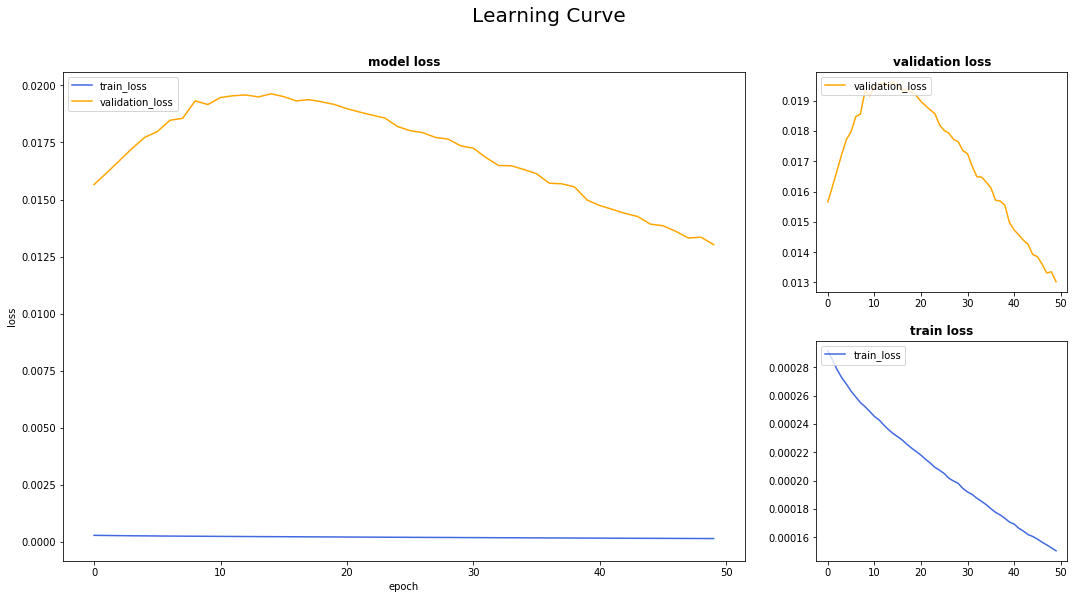

OK. learningCurve.write_pdf


AttributeError: 'DataFrame' object has no attribute 'savefig'

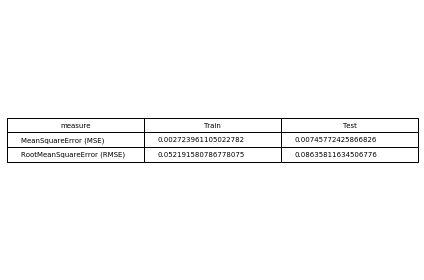

In [131]:
runFullModelProcess(singleRNN,
                    x_train,
                    y_train,
                    epochs=50,
                    modelName="singleCellRNN",
                    write_path="models/singleCellRNN/")

In [113]:
singleRNN.summary()

Model: "vanillaRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_18 (SimpleRNN)    (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [114]:
#vanilla RNN
h = singleRNN.fit(x_train,
                                          y_train,
                                          validation_split=0.2,
                                          epochs=50,
                                          batch_size=64,
                                          verbose=1)

Train on 4528 samples, validate on 1132 samples
Epoch 1/50
4528/4528 [==============================] - 2s 548us/sample - loss: 0.1846 - val_loss: 0.0309
Epoch 2/50
4528/4528 [==============================] - 1s 284us/sample - loss: 0.1047 - val_loss: 0.0203
Epoch 3/50
4528/4528 [==============================] - 1s 304us/sample - loss: 0.0630 - val_loss: 0.0128
Epoch 4/50
4528/4528 [==============================] - 1s 285us/sample - loss: 0.0395 - val_loss: 0.0083
Epoch 5/50
4528/4528 [==============================] - 1s 278us/sample - loss: 0.0254 - val_loss: 0.0064
Epoch 6/50
4528/4528 [==============================] - 1s 278us/sample - loss: 0.0169 - val_loss: 0.0058
Epoch 7/50
4528/4528 [==============================] - 1s 281us/sample - loss: 0.0115 - val_loss: 0.0061
Epoch 8/50
4528/4528 [==============================] - 1s 278us/sample - loss: 0.0080 - val_loss: 0.0069
Epoch 9/50
4528/4528 [==============================] - 1s 273us/sample - loss: 0.0057 - val_loss: 0.007

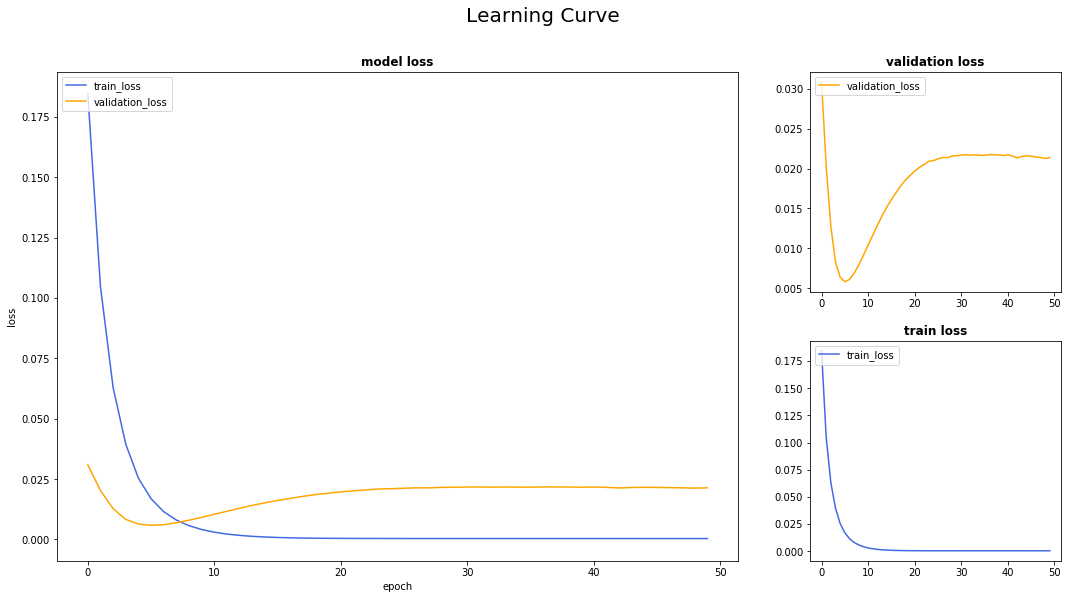

In [115]:
l = plotResults.getLearningCurve_figure(h)
#plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

In [116]:
train_predict=singleRNN.predict(x_train)
test_predict=singleRNN.predict(x_test)

t = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
t

,measure,Train,Test
0,MeanSquareError (MSE),0.004556,0.014007
1,RootMeanSquareError (RMSE),0.067499,0.118353


In [117]:
singleRNN = Sequential(name="vanillaRNN")
singleRNN.add(LSTM(1, input_shape=(x_train.shape[1],x_train.shape[2])))
singleRNN.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
singleRNN.summary()

Model: "vanillaRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [119]:
#vanilla RNN
h = singleRNN.fit(x_train,
                                          y_train,
                                          validation_split=0.2,
                                          epochs=50,
                                          batch_size=64,
                                          verbose=1)

Train on 4528 samples, validate on 1132 samples
Epoch 1/50
4528/4528 [==============================] - 4s 917us/sample - loss: 0.1728 - val_loss: 0.7424
Epoch 2/50
4528/4528 [==============================] - 3s 672us/sample - loss: 0.1379 - val_loss: 0.6501
Epoch 3/50
4528/4528 [==============================] - 3s 599us/sample - loss: 0.1100 - val_loss: 0.5593
Epoch 4/50
4528/4528 [==============================] - 3s 582us/sample - loss: 0.0785 - val_loss: 0.4343
Epoch 5/50
4528/4528 [==============================] - 3s 588us/sample - loss: 0.0447 - val_loss: 0.2838
Epoch 6/50
4528/4528 [==============================] - 3s 582us/sample - loss: 0.0233 - val_loss: 0.1780
Epoch 7/50
4528/4528 [==============================] - 3s 600us/sample - loss: 0.0182 - val_loss: 0.1458
Epoch 8/50
4528/4528 [==============================] - 3s 580us/sample - loss: 0.0168 - val_loss: 0.1303
Epoch 9/50
4528/4528 [==============================] - 3s 592us/sample - loss: 0.0156 - val_loss: 0.119

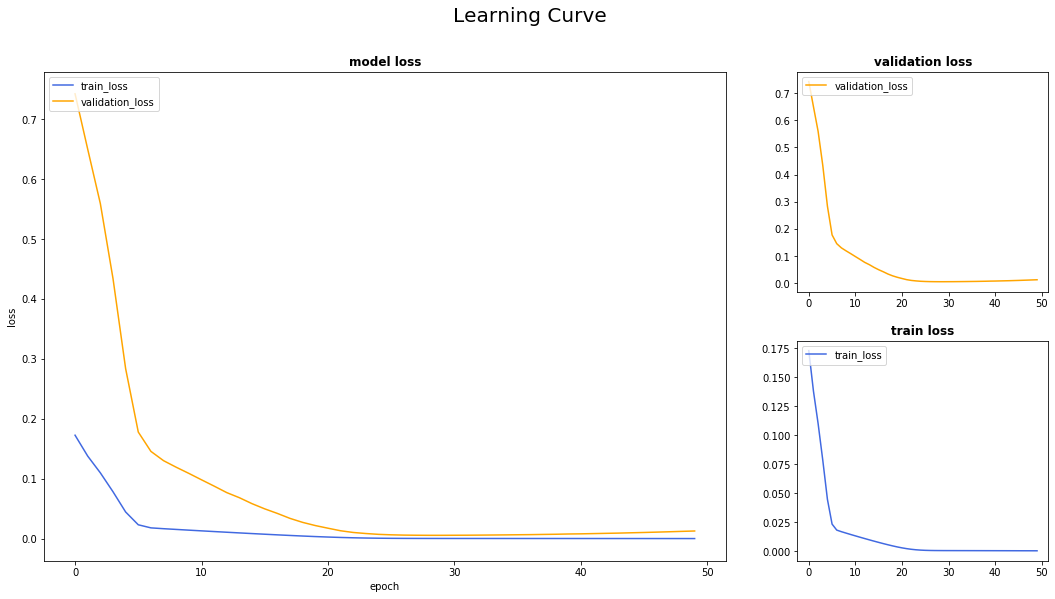

In [120]:
l = plotResults.getLearningCurve_figure(h)
#plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

In [121]:
train_predict=singleRNN.predict(x_train)
test_predict=singleRNN.predict(x_test)

t = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
t

,measure,Train,Test
0,MeanSquareError (MSE),0.002845,0.007121
1,RootMeanSquareError (RMSE),0.053339,0.084386


In [84]:
vanillaRNN_model = Sequential(name="vanillaRNN")
vanillaRNN_model.add(SimpleRNN(15, input_shape=(x_train.shape[1],x_train.shape[2])))
vanillaRNN_model.add(Dense(x_train.shape[2]))
vanillaRNN_model.compile(loss='mean_squared_error',optimizer='adam')

In [85]:
vanillaRNN_model.summary()

Model: "vanillaRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 15)                255       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [86]:
#vanilla RNN
vanillaRNN_history = vanillaRNN_model.fit(x_train,
                                          y_train,
                                          validation_split=0.2,
                                          epochs=50,
                                          batch_size=64,
                                          verbose=1)

Train on 4528 samples, validate on 1132 samples
Epoch 1/50
4528/4528 [==============================] - 2s 491us/sample - loss: 0.0277 - val_loss: 0.1559
Epoch 2/50
4528/4528 [==============================] - 1s 327us/sample - loss: 0.0011 - val_loss: 0.1375
Epoch 3/50
4528/4528 [==============================] - 1s 326us/sample - loss: 8.2546e-04 - val_loss: 0.1190
Epoch 4/50
4528/4528 [==============================] - 1s 325us/sample - loss: 7.5637e-04 - val_loss: 0.1034
Epoch 5/50
4528/4528 [==============================] - 2s 339us/sample - loss: 6.6018e-04 - val_loss: 0.0925
Epoch 6/50
4528/4528 [==============================] - 2s 347us/sample - loss: 6.1063e-04 - val_loss: 0.0788
Epoch 7/50
4528/4528 [==============================] - 1s 323us/sample - loss: 5.4700e-04 - val_loss: 0.0698
Epoch 8/50
4528/4528 [==============================] - 1s 322us/sample - loss: 4.5990e-04 - val_loss: 0.0614
Epoch 9/50
4528/4528 [==============================] - 2s 422us/sample - loss: 

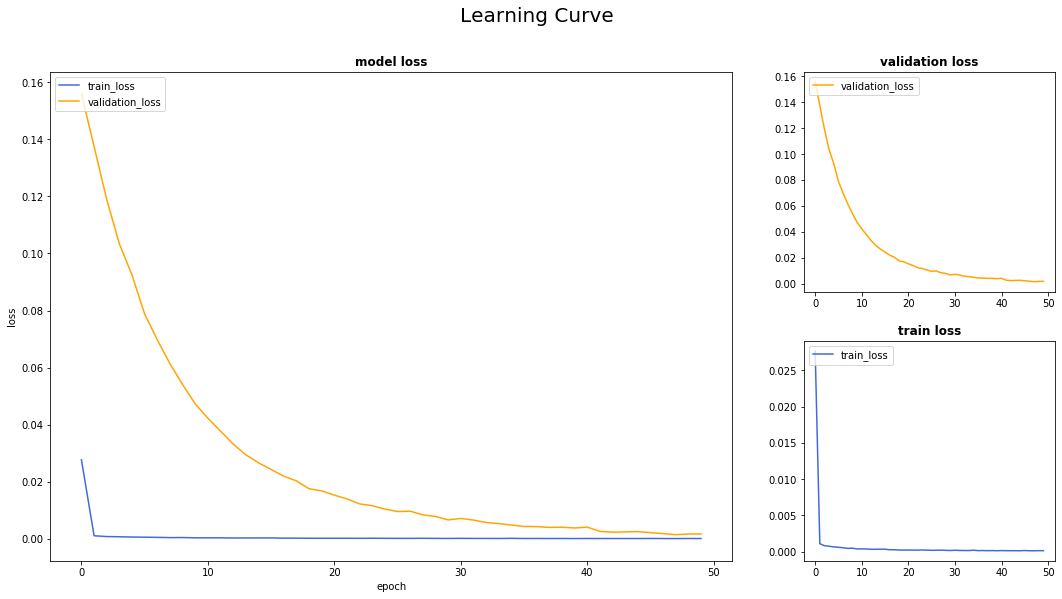

In [89]:
learningCurve = plotResults.getLearningCurve_figure(vanillaRNN_history)
#plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

In [90]:
train_predict=vanillaRNN_model.predict(x_train)
test_predict=vanillaRNN_model.predict(x_test)

vanillaRNN_error = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
vanillaRNN_error

,measure,Train,Test
0,MeanSquareError (MSE),0.000447,0.001059
1,RootMeanSquareError (RMSE),0.021151,0.032543


##### vanillaLSTM model

In [104]:
vanillaLSTM_model = Sequential(name="vanillaLSTM")
vanillaLSTM_model.add(LSTM(15, input_shape=(x_train.shape[1],x_train.shape[2])))
vanillaLSTM_model.add(Dense(x_train.shape[2]))
vanillaLSTM_model.compile(loss='mean_squared_error',optimizer='adam')

In [105]:
vanillaLSTM_model.summary()

Model: "vanillaLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 15)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 1,036
Trainable params: 1,036
Non-trainable params: 0
_________________________________________________________________


In [106]:
#vanilla LSTM
vanillaLSTM_history = vanillaLSTM_model.fit(x_train,
                                          y_train,
                                          validation_split=0.2,
                                          epochs=50,
                                          batch_size=64,
                                          verbose=1)

Train on 4528 samples, validate on 1132 samples
Epoch 1/50
4528/4528 [==============================] - 4s 908us/sample - loss: 0.0108 - val_loss: 0.0074
Epoch 2/50
4528/4528 [==============================] - 3s 584us/sample - loss: 4.5285e-04 - val_loss: 0.0010
Epoch 3/50
4528/4528 [==============================] - 3s 590us/sample - loss: 2.4546e-04 - val_loss: 7.8333e-04
Epoch 4/50
4528/4528 [==============================] - 3s 587us/sample - loss: 2.3415e-04 - val_loss: 8.4741e-04
Epoch 5/50
4528/4528 [==============================] - 3s 596us/sample - loss: 2.2323e-04 - val_loss: 9.2235e-04
Epoch 6/50
4528/4528 [==============================] - 3s 593us/sample - loss: 2.1366e-04 - val_loss: 0.0011
Epoch 7/50
4528/4528 [==============================] - 3s 591us/sample - loss: 2.0486e-04 - val_loss: 0.0011
Epoch 8/50
4528/4528 [==============================] - 3s 660us/sample - loss: 1.9755e-04 - val_loss: 0.0012
Epoch 9/50
4528/4528 [==============================] - 3s 619us

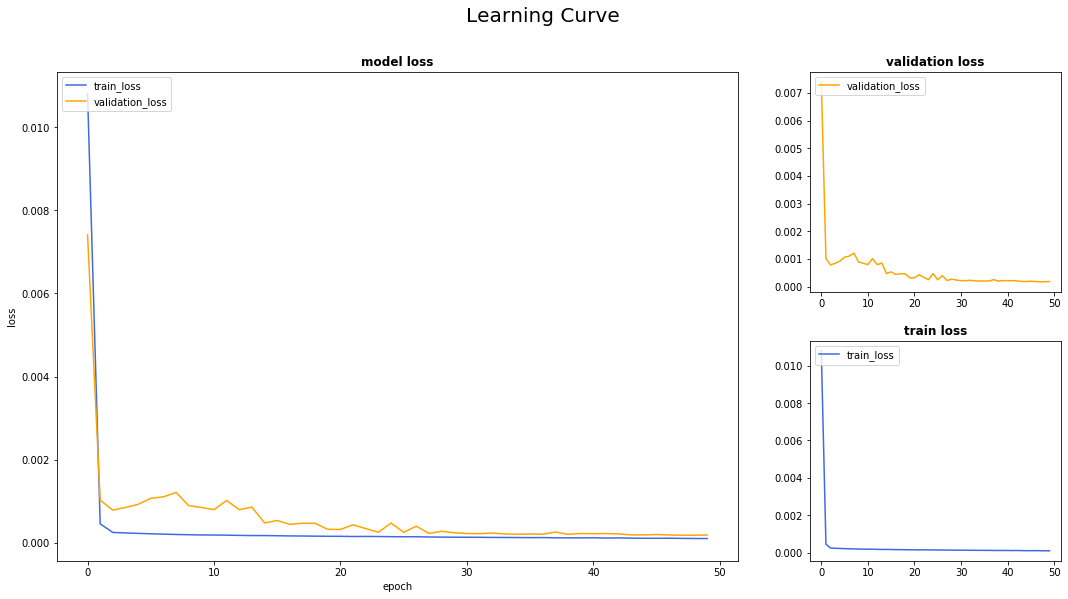

In [107]:
learningCurve = plotResults.getLearningCurve_figure(vanillaLSTM_history)
#plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

In [109]:
train_predict=vanillaLSTM_model.predict(x_train)
test_predict=vanillaLSTM_model.predict(x_test)

vanillaLSTM_table = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
vanillaLSTM_table

,measure,Train,Test
0,MeanSquareError (MSE),0.000116,0.000105
1,RootMeanSquareError (RMSE),0.010769,0.010248


# stacked RNN vs stacked LSTM

In [132]:
model = Sequential()
model.add(LSTM(15,return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(15))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [133]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 15)           1020      
_________________________________________________________________
lstm_8 (LSTM)                (None, 100, 15)           1860      
_________________________________________________________________
lstm_9 (LSTM)                (None, 15)                1860      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 16        
Total params: 4,756
Trainable params: 4,756
Non-trainable params: 0
_________________________________________________________________


In [138]:
#vanilla RNN
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=64,
                    verbose=1)

Train on 4528 samples, validate on 1132 samples
Epoch 1/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 7.9754e-05 - val_loss: 2.7605e-04
Epoch 2/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 8.0079e-05 - val_loss: 4.7663e-04
Epoch 3/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 7.7739e-05 - val_loss: 2.6789e-04
Epoch 4/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 8.9519e-05 - val_loss: 2.3736e-04
Epoch 5/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 9.0179e-05 - val_loss: 4.2026e-04
Epoch 6/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 7.7681e-05 - val_loss: 1.9920e-04
Epoch 7/100
4528/4528 [==============================] - 9s 2ms/sample - loss: 7.7770e-05 - val_loss: 2.1071e-04
Epoch 8/100
4528/4528 [==============================] - 8s 2ms/sample - loss: 8.2219e-05 - val_loss: 7.6215e-04
Epoch 9/100
4528/4528 [=========================

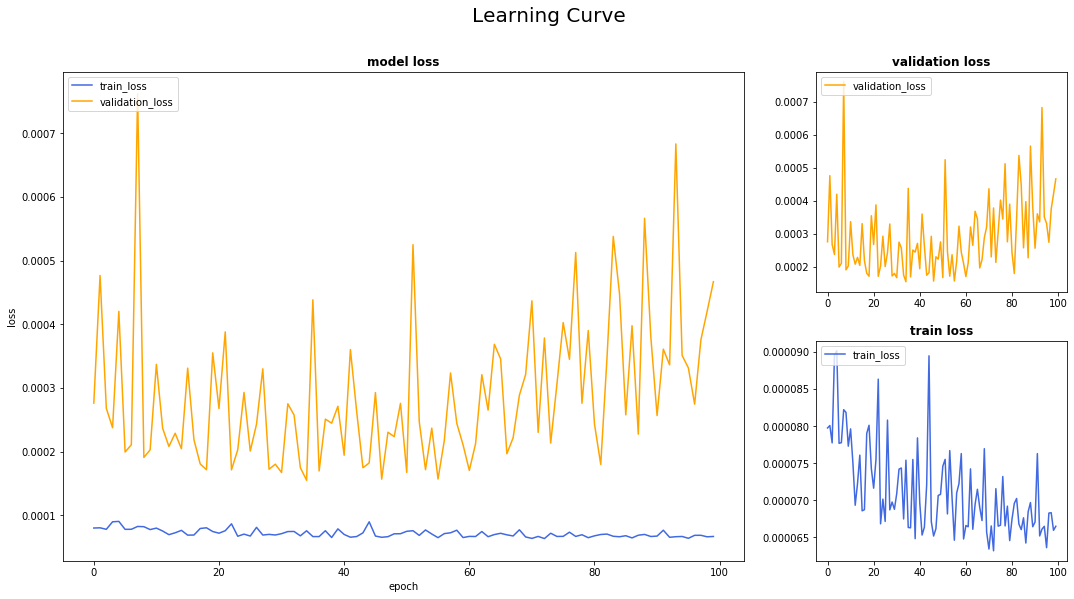

In [140]:
learningCurve = plotResults.getLearningCurve_figure(history)
#plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

In [142]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

errors = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
errors

,measure,Train,Test
0,MeanSquareError (MSE),0.000145,0.000232
1,RootMeanSquareError (RMSE),0.012047,0.015246


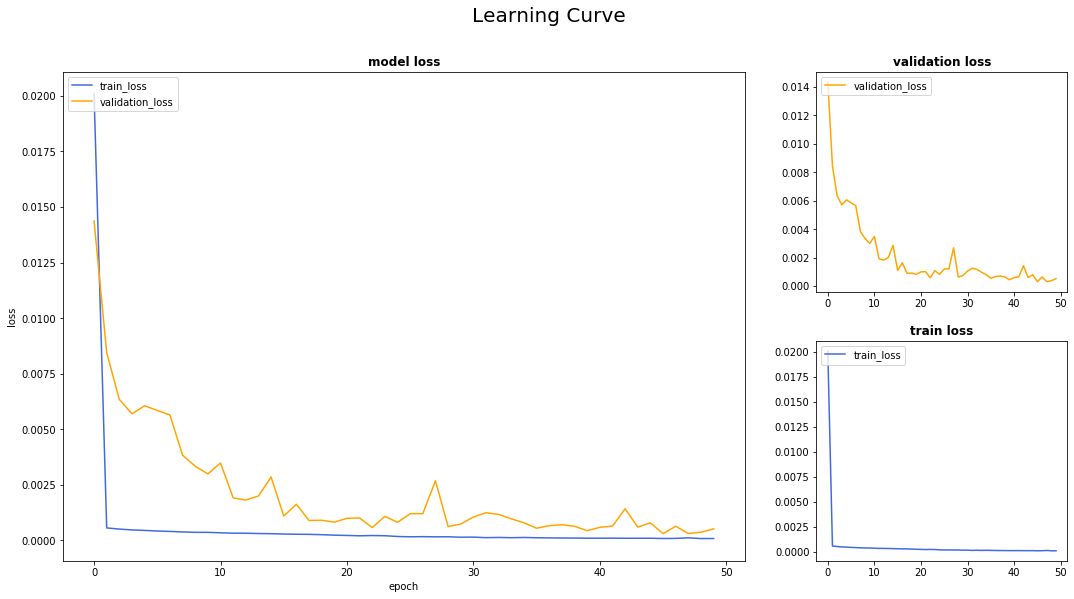

In [136]:
learningCurve = plotResults.getLearningCurve_figure(history)
#plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

In [137]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

errors = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
errors

,measure,Train,Test
0,MeanSquareError (MSE),0.000172,0.000259
1,RootMeanSquareError (RMSE),0.013099,0.016089


### run 5 LSTM models and save them to further comparison

In [15]:
h_array=[]

for i in range(0,5):
    modelName = "lstmModel_v"+str(i+1)
    
    print("Training "+modelName+" ...")
    
    history = model.fit(x_train,y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=64,
                    verbose=1)
    
    model.save("savedModels/"+modelName)
    
    h_array.append(history)

Training lstmModel_v1 ...
Train on 4528 samples, validate on 1132 samples
Epoch 1/100
4528/4528 [==============================] - 4s 948us/sample - loss: 0.0269 - val_loss: 0.0232
Epoch 2/100
4528/4528 [==============================] - 3s 581us/sample - loss: 0.0011 - val_loss: 0.0048
Epoch 3/100
4528/4528 [==============================] - 3s 582us/sample - loss: 4.6945e-04 - val_loss: 0.0078
Epoch 4/100
4528/4528 [==============================] - 3s 672us/sample - loss: 3.5628e-04 - val_loss: 0.0089
Epoch 5/100
4528/4528 [==============================] - 3s 599us/sample - loss: 3.0912e-04 - val_loss: 0.0086
Epoch 6/100
4528/4528 [==============================] - 3s 594us/sample - loss: 2.8380e-04 - val_loss: 0.0076
Epoch 7/100
4528/4528 [==============================] - 3s 581us/sample - loss: 2.6415e-04 - val_loss: 0.0067
Epoch 8/100
4528/4528 [==============================] - 3s 581us/sample - loss: 2.4716e-04 - val_loss: 0.0057
Epoch 9/100
4528/4528 [=======================

KeyboardInterrupt: 

In [21]:
m1 = tensorflow.keras.models.load_model("savedModels/lstmModel_v1")

In [22]:
m2 = tensorflow.keras.models.load_model("savedModels/lstmModel_v2")

In [24]:
h1 = m1.fit(x_train,y_train,
                    validation_split=0.2,
                    epochs=1,
                    batch_size=64,
                    verbose=1)

Train on 4528 samples, validate on 1132 samples
4528/4528 [==============================] - 3s 679us/sample - loss: 6.4773e-05 - val_loss: 1.2346e-04


In [27]:
train_predict=m1.predict(x_train)
test_predict=m1.predict(x_test)

t1 = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
t1

,measure,Train,Test
0,MeanSquareError (MSE),0.000076,0.000065
1,RootMeanSquareError (RMSE),0.008729,0.008078


In [28]:
train_predict=m2.predict(x_train)
test_predict=m2.predict(x_test)

t2 = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)
t2

,measure,Train,Test
0,MeanSquareError (MSE),0.000075,0.000068
1,RootMeanSquareError (RMSE),0.008657,0.008256


## Learning Curve

These plots can help to diagnose whether the model has over learned, under learned, or is suitably fit to the training dataset.
https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

#### OBS:
Note that what was printed above as "loss", actually refers to cost_function
<br>
<br>
* One __EPOCH__ is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.<br>
* The __COST_FUNCTION__ (Results from whole trainining data_set samples analysis)<br>
It is a single value that measures how bad was the model at particular EPOCH, by calculating the mean between all LOSS_FUNCTIONS.<br>
* The __LOSS_FUNCTION__ (Results from one single training sample analysis)<br>
It is the cost of a single training example. Difference between values predicted and the actuals outputs expected. (usually: Mean Squared Error)
* The __OPTIMIZERS__<br>
Once we have the COST_FUNCTION of an Epoch, we can apply __OPTIMIZERS__ in order to reduce its value, and therefore find a minimal COST<br>

In [26]:
import plotResults as plotResults

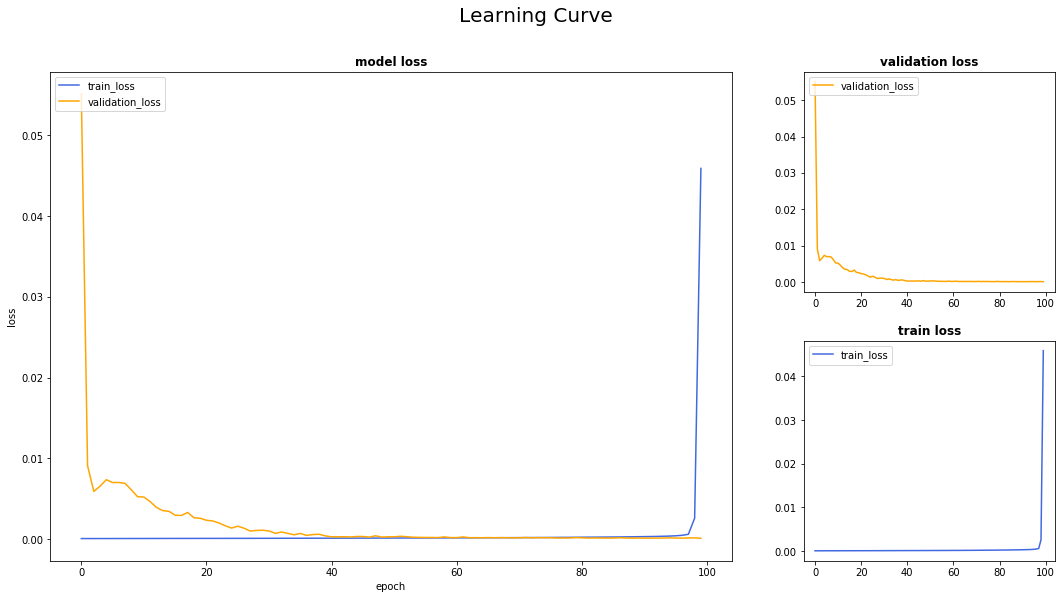

In [80]:
learningCurve = plotResults.getLearningCurve_figure(history)
plotResults.write_pdf('learningCurve/learningCurve.pdf', [learningCurve])

### 4st Step

# Predictions

## model.predict()

In [81]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

## Dataset back to original format

In [82]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [83]:
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

## Print prediction performance metrics

In [84]:
%%capture
predictionPerformance_table = plotResults.getPerformanceMetrics_table(train_predict=train_predict,
                                 test_predict=test_predict,
                                 y_train=y_train,
                                 y_test=y_test)

predictionPerformance = plotResults.getPerformanceMetrics_figure(predictionPerformance_table)

#plotResults.write_pdf('learningCurve/predictionPerformance.pdf', [predictionPerformance])

In [85]:
predictionPerformance_table

,measure,Train,Test
0,MeanSquareError (MSE),2.107438e-08,1.658250e-08
1,RootMeanSquareError (RMSE),1.451702e-04,1.287730e-04


# Comeco a bagunca, PLOTTING

In [87]:
import plottingData_library.predictionGraph as predictionGraph

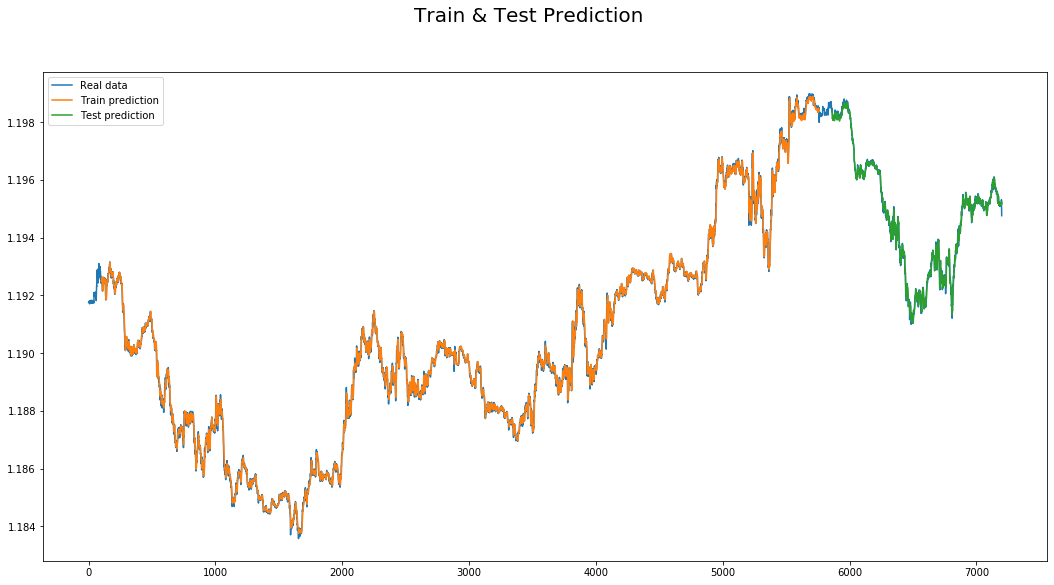

In [88]:
fig = predictionGraph.getFullPrediction_graph(df, time_step, train_data, train_predict, test_predict)

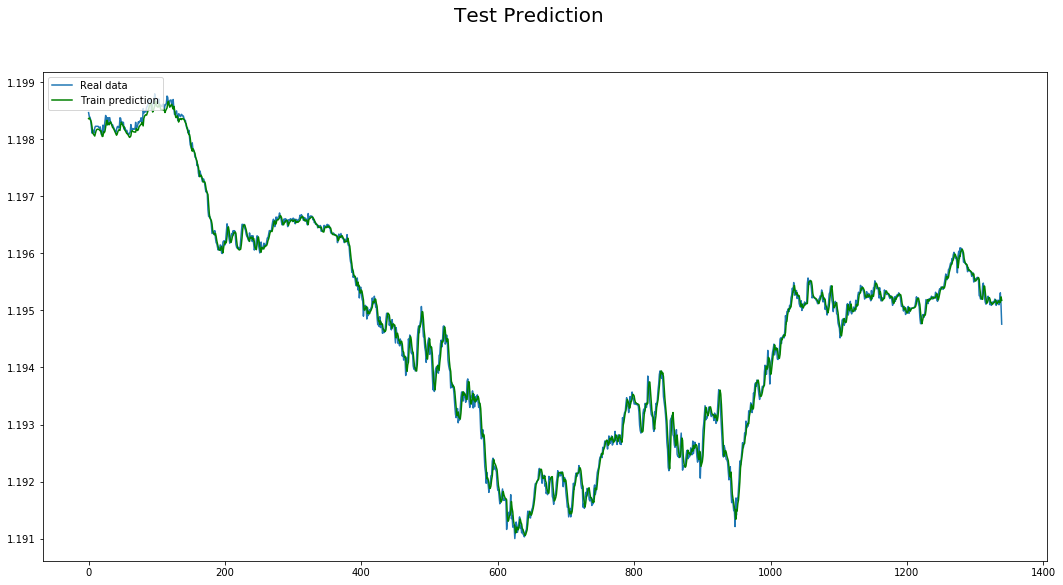

In [89]:
fig = predictionGraph.getTestPrediction_graph(y_test, test_predict)
#plotResults.write_pdf('plottingData_figures/testPrediction_graph.pdf', [fig])

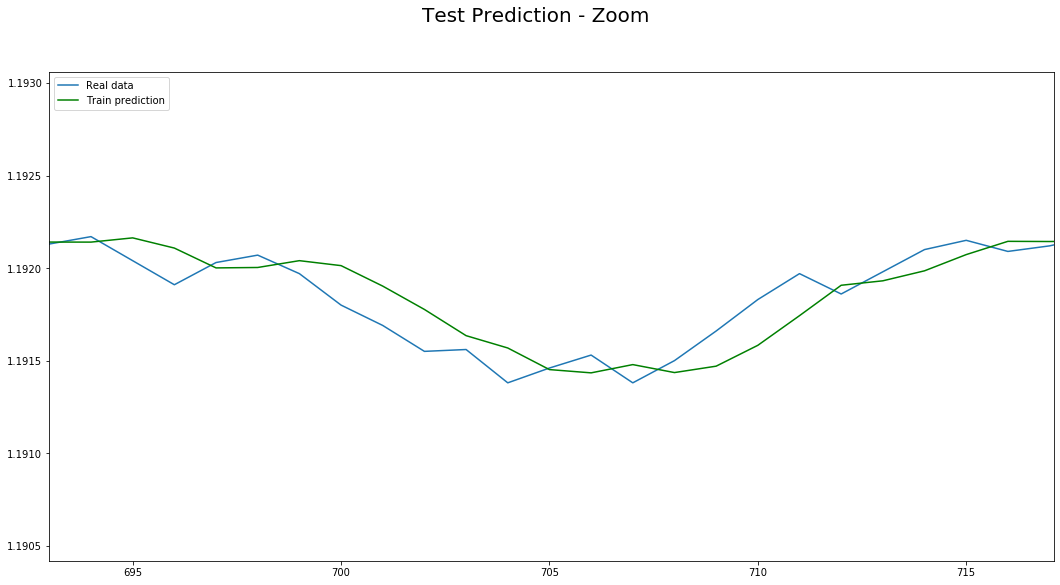

In [90]:
zoom_configs={"xAxix_zoomOut":0.01,
              "yAxix_zoomOut":0.001}
fig = predictionGraph.getTestPredictionZoomed_graph(y_test,
                                    test_data_unf,
                                    test_predict,
                                    predict_position = 700,
                                    n_predictSteps = 10,
                                    zoom_configs = zoom_configs)

x_input.shape: (1, 100)


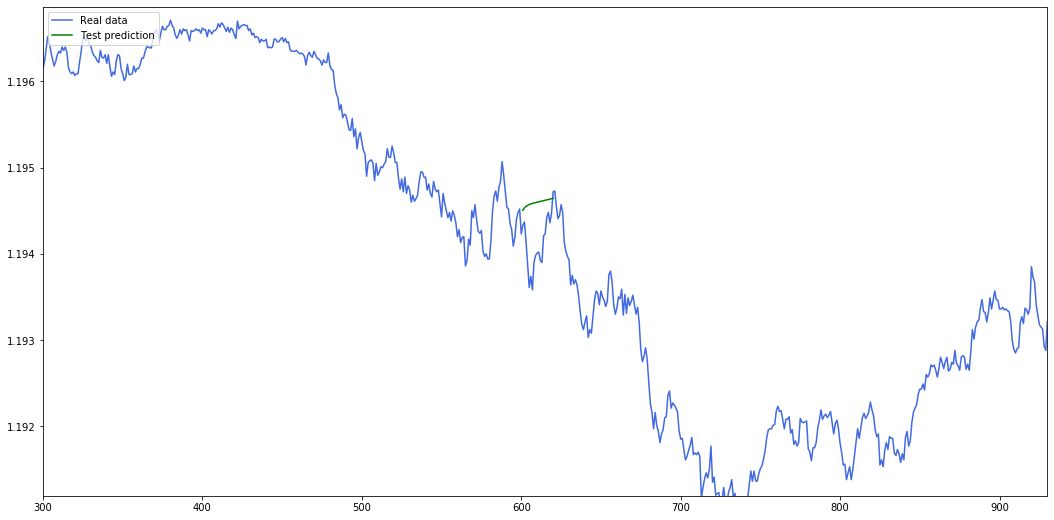

In [105]:
##30 minutes prediction goes pretty well !!
zoom_configs={"xAxix_zoomOut":0.5,
              "yAxix_zoomOut":0.002}

predictionGraph.predictLSTM(df,
                            model,
                            scaler,
                            time_step,
                            test_data_unf,
                            test_data,
                            predict_position = 600,
                            n_predictSteps= 20,
                            zoom_configs=zoom_configs) 

### backup

In [124]:
def predictLSTM(n_predictSteps, predict_position, xAxix_zoomOut=0.001, yAxix_zoomOut=0.001):

    print("len(test_data): "+str(len(test_data)))

    # create x_input from test_data reshaped
    x_input=test_data[predict_position-time_step:predict_position].reshape(1,-1)
    print("x_input.shape: "+str(x_input.shape))

    # create temp_input from x_input
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()


    # demonstrate prediction for next 10 days
    from numpy import array

    lst_output=[]
    model_timeSteps=100
    i=0
    while(i<n_predictSteps):

        if(len(temp_input)>time_step):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            
            x_input = x_input.reshape((1, model_timeSteps, 1))
            yhat = vanillaLSTM_model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            
            i=i+1
        else:
            x_input = x_input.reshape((1, model_timeSteps,1))
            yhat = vanillaLSTM_model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            
            i=i+1

    print("len(lst_output):"+str(len(lst_output)))
    
    day_new=np.arange(1,len(test_data))
    day_pred=np.arange((predict_position+1),(predict_position+1+n_predictSteps))

    print("len(df):"+str(len(df)))

    #plt.figure(figsize = (18,9))
    #plt.xlim(1325,1340)
    #plt.ylim(1.194, 1.196)
    
    xa,xb=(predict_position,predict_position+n_predictSteps)
    ya,yb=(min(test_data_unf[xa:xb].values),max(test_data_unf[xa:xb].values))
    plt.figure(figsize = (18,9))
    
    plt.xlim(xa*(1-xAxix_zoomOut),xb*(1+xAxix_zoomOut))
    plt.ylim(ya*(1-yAxix_zoomOut),yb*(1+yAxix_zoomOut))

    plt.plot(day_new,df[len(df)-len(day_new):len(df)],color='royalblue')
    plt.plot(day_pred,scaler.inverse_transform(lst_output),color='green')
    
    plt.legend(['Real data','Test prediction'], loc='upper left')
    

len(test_data): 1440
x_input.shape: (1, 100)
len(lst_output):60
len(df):7200


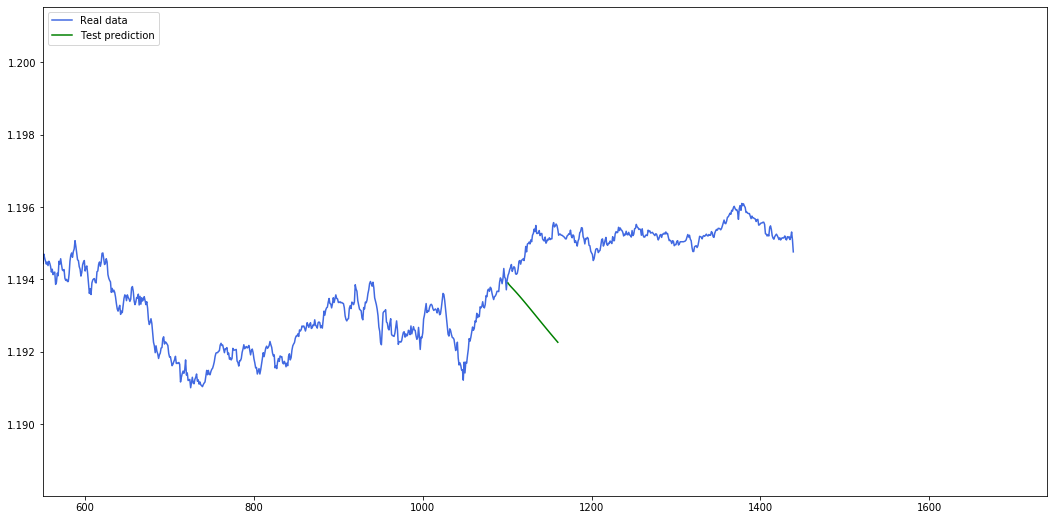

In [127]:
predictLSTM(n_predictSteps = 60,
            predict_position = 1100,
            xAxix_zoomOut = 0.5,
            yAxix_zoomOut = 0.005) 

len(test_data): 1440
x_input.shape: (1, 100)
len(lst_output):20
len(df):7200


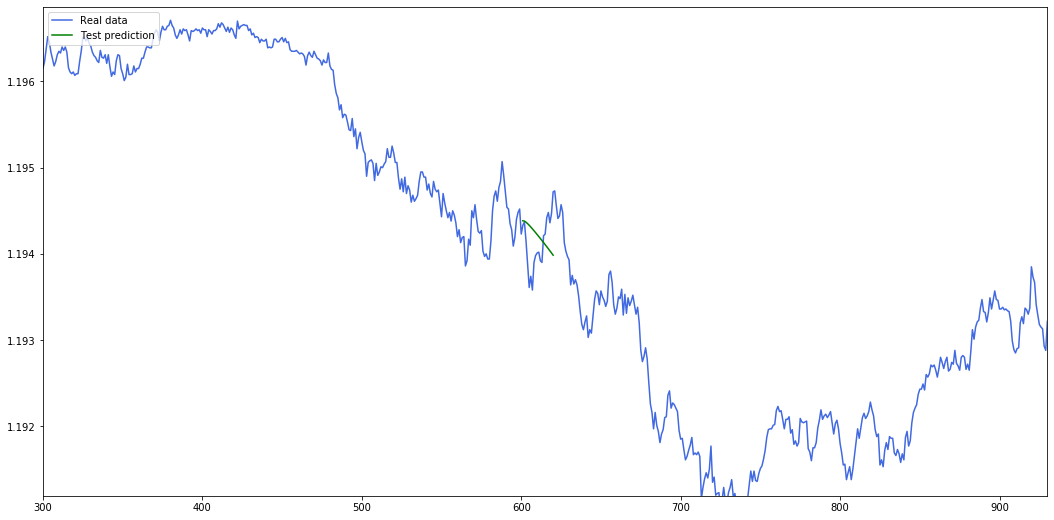

In [125]:
##30 minutes prediction goes pretty well !!
predictLSTM(n_predictSteps = 20,
            predict_position = 600,
            xAxix_zoomOut = 0.5,
            yAxix_zoomOut = 0.002) 

len(test_data): 1440
x_input.shape: (1, 100)
len(lst_output):20
len(df):7200


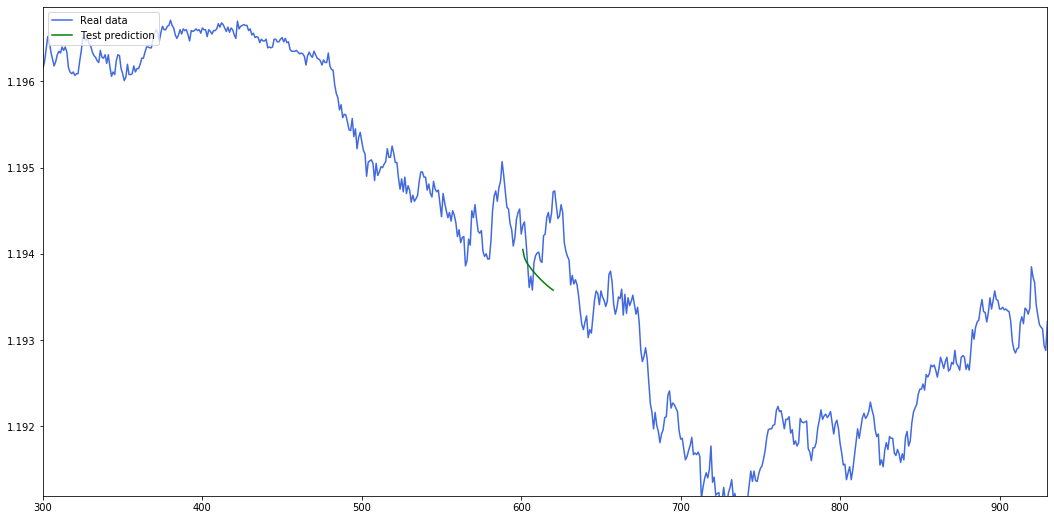

In [123]:
##30 minutes prediction goes pretty well !!
predictLSTM(n_predictSteps = 20,
            predict_position = 600,
            xAxix_zoomOut = 0.5,
            yAxix_zoomOut = 0.002) 